In [51]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab
from pylab import *
import matplotlib.dates as mdate
from numpy import genfromtxt
import matplotlib.patches as patches
import os
import math

%matplotlib inline

In [65]:
def get_synopsis_stats(dir_name):
    files = os.listdir(dir_name)
    all_entries = []
    for f in files:
        f_path = dir_name + '/' + f
        f_entries = genfromtxt(f_path, delimiter=',')
        all_entries.append(f_entries[:,1]/math.pow(10,6))
    latencies = np.hstack(all_entries)
    return (np.mean(latencies), np.std(latencies), np.percentile(latencies, 95))

def get_sparksql_stats(f_name):
    latencies = genfromtxt(f_name, delimiter=',')
    return (np.mean(latencies)*1000, np.std(latencies)*1000, np.percentile(latencies, 95)*1000)

In [66]:
dirs = ['1_node', '2_node', '4_node', '8_node', '16_node']
stats = []
for d in dirs:
    stats.append(get_synopsis_stats('./spark-sql/synopsis/' + d))
syn_data = np.array(stats)

spark_sql_files = ['1', '2', '4', '8', '16']
spark_stats = []
for f in spark_sql_files:
    spark_stats.append(get_sparksql_stats('./spark-sql/spark-sql/spark-sql-' + f + '.csv'))
spark_data = np.array(spark_stats)
print(spark_data.shape)

(5, 3)


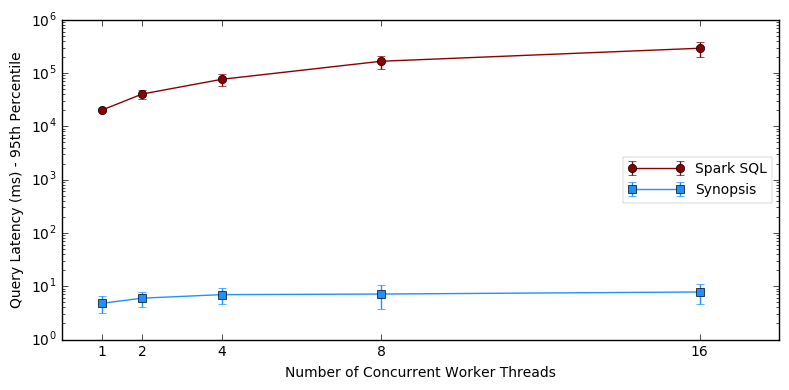

In [70]:
x_vals = [1, 2, 4, 8, 16]
fig,ax = plt.subplots(figsize=(8,4))
ax.set_yscale("log", nonposy='clip')
leg_spark = plt.errorbar(x_vals, spark_data[:,2], yerr=spark_data[:,1], color='darkred', marker='o', lw=1, label='Spark SQL')
leg_syn = plt.errorbar(x_vals, syn_data[:,2], yerr=syn_data[:,1], color='dodgerblue', marker='s', lw=1 ,label='Synopsis')
plt.xlabel('Number of Concurrent Worker Threads', fontsize=10)
plt.ylabel('Query Latency (ms) - 95th Percentile', fontsize=10)
plt.xlim(0, 18)
plt.xticks(x_vals)

lns = (leg_spark, leg_syn)
labs = [l.get_label() for l in lns]
leg = ax.legend(lns, labs, fontsize=10, ncol=1, loc='center right', borderaxespad=0.5, handlelength=4)
#leg = ax3.legend(lns, labs, fontsize=9)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()
plt.savefig('./spark-sql-query.pdf', dpi=300)